# 4Team EDA

## 1. 라이브러리 & 한글폰트 설정

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

## 2. 데이터 불러오기

In [14]:
df = pd.read_csv('./data/Employee_Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3. 기본 정보 확인
- 총 1470개의 데이터, 결측치 없음.
- 범주형 변수(object)와 수치형 변수

## 🎯 타겟 변수

| 변수명      | 한국어 이름 | 설명                        | 데이터 타입 |
|-------------|--------------|-----------------------------|-------------|
| Attrition   | 퇴사 여부    | 직원이 퇴사했는지 여부     | 범주형 (Yes/No) |

---

## 👤 인적 특성

| 변수명             | 한국어 이름     | 설명                            | 데이터 타입 |
|--------------------|------------------|----------------------------------|-------------|
| Age                | 나이             | 직원의 나이 (18~60세)            | 정수형 (int) |
| Gender             | 성별             | 남성/여성                        | 범주형 (Male/Female) |
| MaritalStatus      | 결혼 여부        | 미혼, 기혼, 이혼                 | 범주형 |
| Over18             | 성인 여부        | 모두 'Y'                         | 범주형 |
| NumCompaniesWorked | 이직 횟수        | 이전에 다닌 회사 수              | 정수형 (int) |

---

## 💼 직무 관련

| 변수명                  | 한국어 이름         | 설명                               | 데이터 타입 |
|-------------------------|----------------------|------------------------------------|-------------|
| Department              | 부서                 | Sales, R&D, HR                     | 범주형 |
| JobRole                 | 직무                 | 연구원, 영업, 관리자 등            | 범주형 |
| JobLevel                | 직급 수준            | 직급 등급 (1~5)                   | 순서형 (int) |
| BusinessTravel          | 출장 빈도            | 자주/가끔/없음                     | 범주형 |
| YearsAtCompany          | 회사 근속 연수       | 해당 회사에서 근무한 총 연수       | 정수형 (int) |
| YearsInCurrentRole      | 현재 직무 연수       | 현재 직무에서 일한 연수            | 정수형 (int) |
| YearsSinceLastPromotion | 최근 승진 이후 연수  | 마지막 승진 이후 경과한 연수       | 정수형 (int) |
| YearsWithCurrManager    | 현 상사와의 근무 연수 | 현재 상사와 함께 근무한 연수       | 정수형 (int) |

---

## 📚 학력 및 교육

| 변수명               | 한국어 이름     | 설명                         | 데이터 타입 |
|----------------------|------------------|------------------------------|-------------|
| Education            | 교육 수준        | 1~5 단계 (고졸~박사)         | 순서형 (int) |
| EducationField       | 전공 분야        | Life Sciences, Medical 등     | 범주형 |
| TrainingTimesLastYear| 연간 교육 횟수   | 1년간 수강한 교육 횟수       | 정수형 (int) |

---

## 💰 급여 및 복지

| 변수명           | 한국어 이름      | 설명                          | 데이터 타입 |
|------------------|-------------------|-------------------------------|-------------|
| MonthlyIncome     | 월급              | 실제 월급 금액(보너스 등 포함)                | 연속형 (float/int) |
| HourlyRate        | 시급              | 시간당 급여                   | 정수형 (int) |
| DailyRate         | 일급              | 하루 단위 급여                | 정수형 (int) |
| MonthlyRate       | 월 단위 급여      | 월별 급여 수준                | 정수형 (int) |
| PercentSalaryHike | 급여 인상률       | 최근 연봉 인상률              | 정수형 (int) |
| StockOptionLevel  | 스톡옵션 수준     | 0~3단계                       | 순서형 (int) |
| OverTime          | 초과 근무 여부    | 초과근무 여부 (`Yes`, `No`)   | 범주형 |

---

## 🧠 직무 만족도 및 성과

| 변수명                  | 한국어 이름         | 설명                          | 데이터 타입 |
|--------------------------|----------------------|-------------------------------|-------------|
| JobSatisfaction          | 직무 만족도          | 1~4 점                        | 순서형 (int) |
| EnvironmentSatisfaction  | 근무 환경 만족도     | 1~4 점                        | 순서형 (int) |
| RelationshipSatisfaction | 대인관계 만족도      | 1~4 점                        | 순서형 (int) |
| WorkLifeBalance          | 워라밸 만족도        | 1~4 점                        | 순서형 (int) |
| PerformanceRating        | 성과 평가 등급       | 보통 3 또는 4                 | 순서형 (int) |

---

## 🔢 기타 변수

| 변수명          | 한국어 이름       | 설명                           | 데이터 타입 |
|-----------------|--------------------|--------------------------------|-------------|
| DistanceFromHome| 집과의 거리        | 집에서 회사까지 거리           | 정수형 (int) |
| TotalWorkingYears| 총 경력 연수      | 지금까지 일한 총 연수          | 정수형 (int) |
| EmployeeNumber  | 직원 고유 번호     | 식별자                         | 정수형 (ID) |
| EmployeeCount   | 직원 수            | 모두 1                        | 상수 |
| StandardHours   | 표준 근무 시간     | 모두 80                     | 상수 |


In [15]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 4. 결측치 & 이상치 확인

In [16]:
# 4. 결측치 & 이상치 확인

# (1) 결측치 확인
print("결측치 개수:")
print(df.isnull().sum())

# (2) 이상치 확인 (IQR 방법 예시)
numeric_cols = df.select_dtypes(include='number').columns

print("\n이상치 개수 (IQR 기준):")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    outliers = df[outlier_condition]
    print(f"{col}: {outliers.shape[0]}개")


결측치 개수:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
Ye

## 5. 타겟 분포 시각화
- (Attrition 클래스 불균형 확인)
- 이후 분류 모델 성능 평가 시, 정확도보다는 F1-score 또는 recall 등도 함께 고려

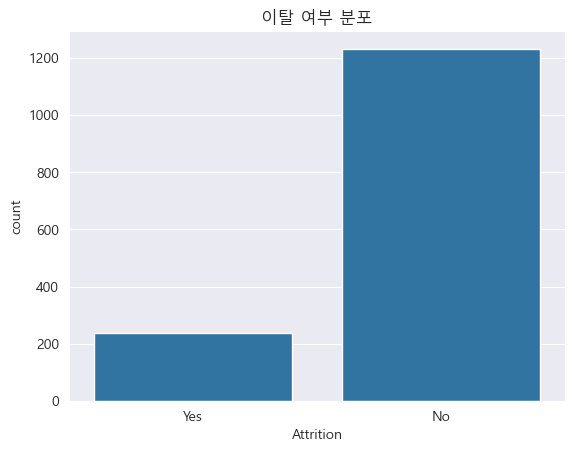

In [17]:
sns.countplot(data=df, x='Attrition')
plt.title("이탈 여부 분포")
plt.show()


## 6-1. 전체 상관계수 행렬 시각화

- MonthlyIncome은 TotalWorkingYears, JobLevel과 높은 양의 상관관계 → 경력이 많고 직급이 높을수록 월급도 높음.
- Age와 YearsAtCompany, TotalWorkingYears도 비례관계가 있음.
- Attrition_n과는 대부분의 변수 간 상관계수 절댓값이 0.3 미만 → 직접적인 선형 관계는 약함.

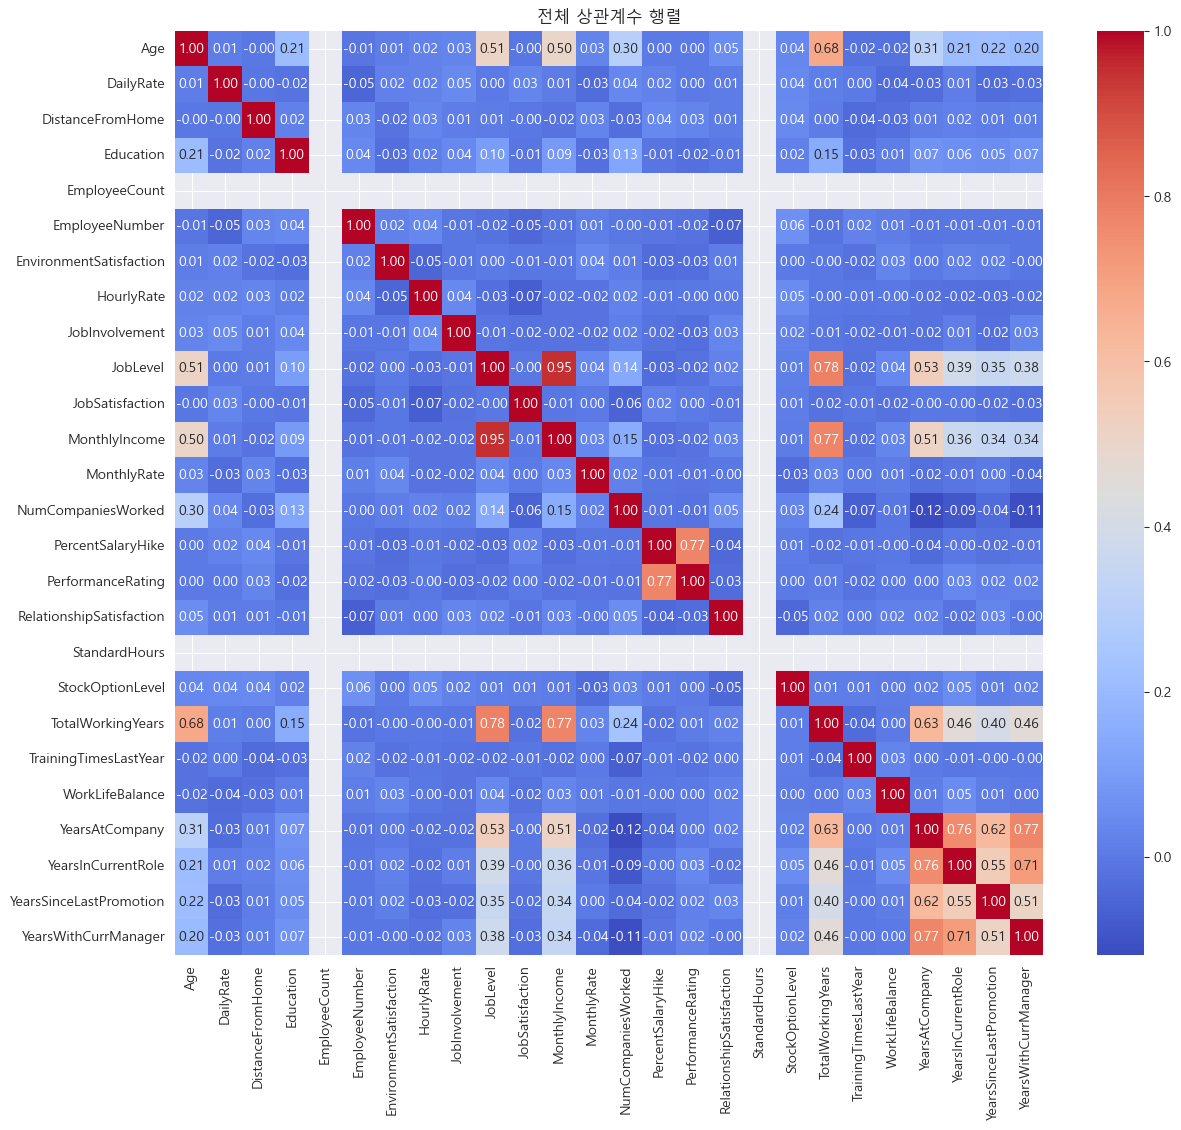

In [18]:
# 전체 수치형 변수 간의 상관계수 시각화
corr_mat = df.corr(numeric_only=True)
plt.figure(figsize=(14, 12))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("전체 상관계수 행렬")
plt.show()

## 6-2. 상관계수 0.1 이상 필터링 후 시각화

- 중요 변수 후보를 13개로 필터링

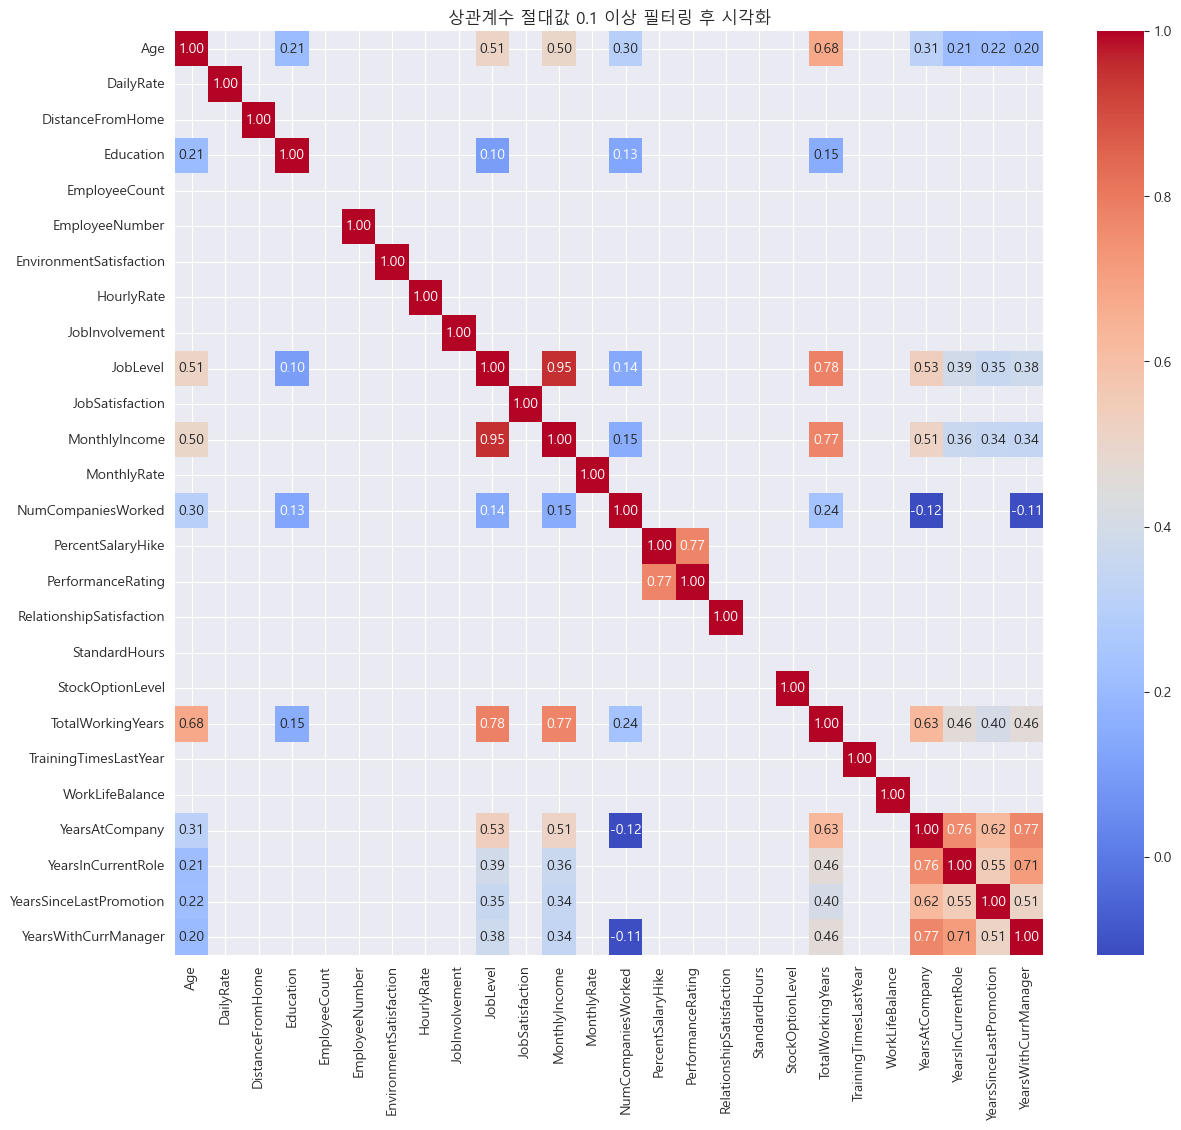

In [19]:
# 0.1 이상인 상관계수만 필터링하여 시각화
filtered_corr_mat = corr_mat[corr_mat.abs() >= 0.1]
plt.figure(figsize=(14, 12))
sns.heatmap(filtered_corr_mat, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("상관계수 절대값 0.1 이상 필터링 후 시각화")
plt.show()


> 타겟 변수와 상관계수 절대값이 0.1 이상인 변수만 선별. (13개의 주요 변수)

In [20]:
# 1. 주요 범주형 변수 숫자 변환
df['Attrition_n'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime_n'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['BusinessTravel_n'] = df['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})
# 필요시 추가적으로 object 타입인데 숫자로 해석 가능한 것들 캐스팅
df['DistanceFromHome'] = pd.to_numeric(df['DistanceFromHome'], errors='coerce')

# 2. 상관계수 계산 (숫자형 변수만)
df_corr = df.corr(numeric_only=True)

# 3. Attrition_n 기준 상관계수 절댓값 정렬
target_corr = df_corr['Attrition_n'].abs().sort_values(ascending=False)

# 4. 기준 이상 변수 추출 (0.1 이상)
selected_features = target_corr[target_corr >= 0.1].index.tolist()
selected_features.remove('Attrition_n')

# 5. 최종 결과
print("선택된 변수 (총 {}개):".format(len(selected_features)))
print(selected_features)

# 6. 선택된 변수로 데이터프레임 구성
df_selected = df[selected_features + ['Attrition_n']]


선택된 변수 (총 13개):
['OverTime_n', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement', 'BusinessTravel_n', 'JobSatisfaction', 'EnvironmentSatisfaction']


### 6-3. 주요 변수 13개 간 상관관계 히트맵

- TotalWorkingYears와 MonthlyIncome: 높은 양의 상관관계
- OverTime_n과 Attrition_n: 양의 상관관계 → 야근 많을수록 이탈 확률 높음
- JobLevel은 TotalWorkingYears와 비례 관계



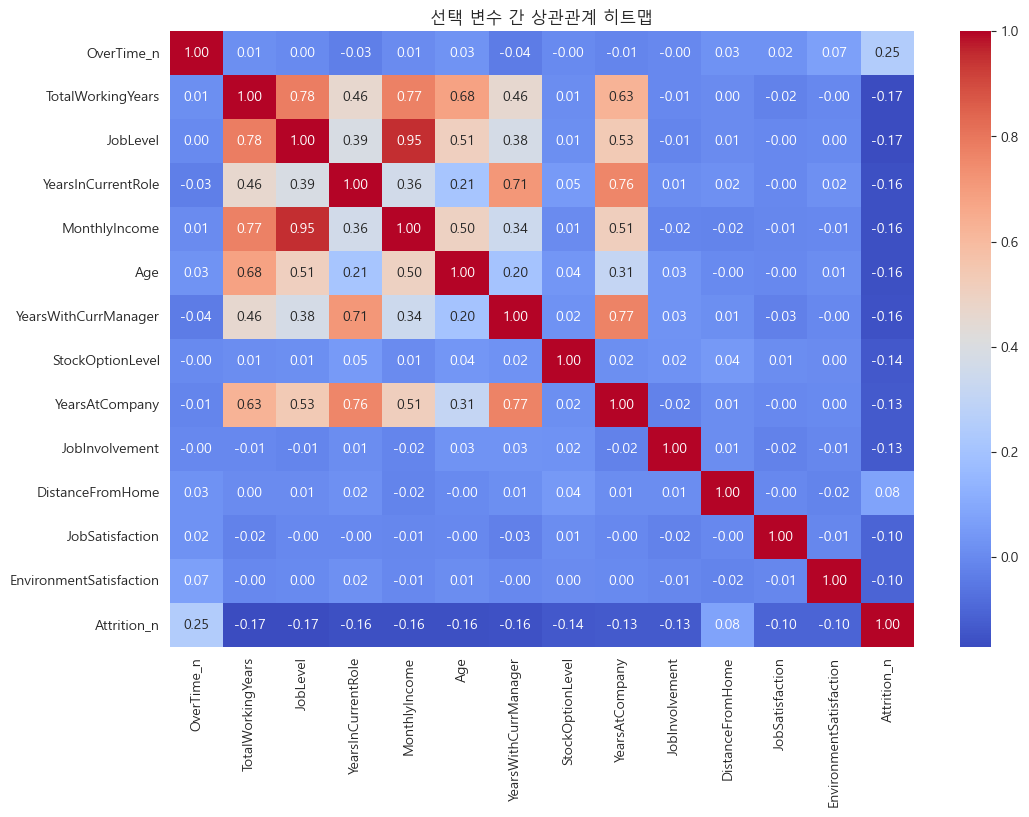

In [22]:
# 파생 변수 생성 (중복 실행 방지)
df['Attrition_n'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime_n'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['BusinessTravel_n'] = df['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})

# 선택된 변수
selected_features = ['OverTime_n', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole',
                     'MonthlyIncome', 'Age', 'YearsWithCurrManager', 'StockOptionLevel',
                     'YearsAtCompany', 'JobInvolvement', 'DistanceFromHome',
                     'JobSatisfaction', 'EnvironmentSatisfaction']
df_selected = df[selected_features + ['Attrition_n']]

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("선택 변수 간 상관관계 히트맵")
plt.show()

## 7. 파생 변수 생성 (범주형 변수 인코딩)

모델링을 위해 범주형 변수들을 숫자형으로 변환

- `Attrition_n`: 타겟 변수
- `OverTime_n`: 초과근무 여부
- `BusinessTravel_n`: 출장 빈도

In [23]:
df['Attrition_n'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime_n'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['BusinessTravel_n'] = df['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})

## 8. EDA 요약 및 모델링을 위한 준비

- 전체 데이터에 대해 결측치, 이상치, 변수 간 관계를 탐색함
- `Attrition`과 유의미한 상관관계를 보이는 변수들을 추출하여 13개로 압축함
- 주요 범주형 변수들을 숫자형으로 변환하여 모델 학습 준비를 완료함